In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

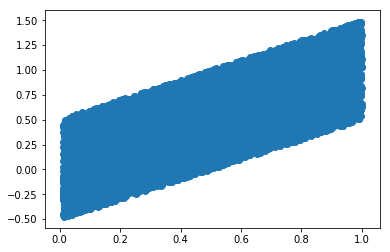

In [2]:
n = 10000
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 1, n)  + np.random.rand(n) - .5


plt.scatter(x,y)

# Assignment 5

## 1. Create and fit a Linear Regression Model
## Calculate the Training error and Testing error using sklearn with a .50 split 
For error, use `mean_squared`, but if you want to experiment with other mean errors, please do!

array([0.99683681])

0.005947258724915749

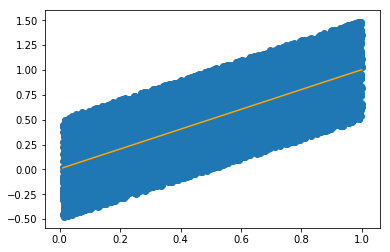

In [3]:
# First, display no split
from IPython.display import display

model = LinearRegression()
model.fit(x, y)
display(model.coef_, model.intercept_)

plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_, c="orange")

slope N y intercept:


array([0.98115406])

0.012984015724736675


MSE test set:


0.08035276735868634


MSE train set:


0.0834340200181185


Interestingly, my test set and train set error values go up and down such that one is higher over the other at one instance while others not


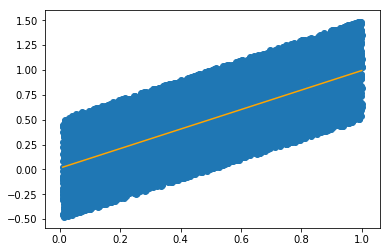

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print("slope N y intercept:")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)
model = LinearRegression()
model.fit(x_train, y_train)
display(model.coef_, model.intercept_)

plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_, c="orange")
print("")
print("MSE test set:")
display(mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_))

print("")
print("MSE train set:")
display(mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_))

print("")
print("Interestingly, my test set and train set error values go up and down such that one is higher over the other at one instance while others not")

In [5]:
print("Of course, the lengthy, thought-provoking method:")

model = LinearRegression()
model.fit(x[:5000], y[:5000])
display(model.coef_, model.intercept_)

print("Unsurprisingly, looks about the same without the split: ")
print("array([0.99385948] 0.003963443233241715)")
# ...which means y is not negative 1 at x with nearly 1:1 slope"

# I'm going to skip the graphs because it's just going to look the same
print("")
print("")
print("Let's see it shuffled")
def shuffle(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return p
p = shuffle(x, y)
display(p)

print("")
print("First 5000")
model = LinearRegression()
model.fit(x[p][:5000], y[p][:5000])
display(model.coef_, model.intercept_)

print("")
print("Here is the error term for the training set:")
display(np.sum(np.square(y[p][:5000] - (np.dot(x[p][:5000], model.coef_) + model.intercept_)))/5000)

print("")
print("Here is the error term for the test set:")
model.fit(x[p][5000:], y[p][5000:])
np.sum(np.square(y[p][5000:] - (np.dot(x[p][5000:], model.coef_) + model.intercept_)))/5000

Of course, the lengthy, thought-provoking method:


array([1.00059855])

0.004634196704548066

Unsurprisingly, looks about the same without the split: 
array([0.99385948] 0.003963443233241715)


Let's see it shuffled


array([2207, 4662, 1786, ..., 2401,  206, 6229])


First 5000


array([1.01242729])

0.001521019864871298


Here is the error term for the training set:


0.08193636886609991


Here is the error term for the test set:


0.08174575644944475

In [6]:
# Cool.

## 2.  Repeat #1 for a Ridge Regression

In [7]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

print("")
print("training set:")
display(mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_))

print("")
print("test set:")
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)



training set:


0.08343448585658265


test set:


0.08036541557057983

In [8]:
# considering the dense data, this makes sense

## 3. Vary the `split` size from .01 to .99 with at least 10 values (the more the merrier!). Plot the resulting Training error and Testing error vs. `split` size. Create separate plots for Linear and Ridge

In [ ]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_, sp)

## 4. Chose an ideal split size based on the previous plot for Ridge.
## Vary the Ridge parameter `alpha` from 0 to any value you'd like above 1. Plot the Train and Test error. Describe what you see based on the `alpha` parameter's stiffness.

## Bonus. Either: Generate data  with a polynomial shape or use real data that you find on your own. Choose whatever regression model and process you'd like (Ridge, polynomial, etc.) and plot the Train-Test errors vs. any parameter your Model depends on (e.g. `alpha`, `degree`, etc.)